In [1]:
# Import Neccessary Lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\us953\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


# Exploratory Data Analysis

In [3]:
# Size of dataset.
df.shape

(571, 43)

##### This dataset contains 571 rows and 43 columns, out of which one column represents the target variable and the remaining eleven columns are independent variables.

In [4]:
# Number of columns present in this dataset.
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [5]:
# removing unnecessary columns
df.drop('Seat No.', axis=1, inplace=True)

In [6]:
# checking unique values of columns.
df['MT-442'].unique()

array(['B+', 'C-', 'A', 'A-', 'B', 'A+', 'C+', nan, 'B-', 'C', 'D+', 'D',
       'F'], dtype=object)

In [7]:
# List of column names containing grades (object type)

# Replace negative signs with positive signs in grade columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace('-', '').str.replace('+', '')

In [8]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B,D,C,C,C,D,D,C,B,C,...,C,C,C,C,A,A,C,B,A,2.205
1,A,D,D,D,B,C,D,A,D,D,...,D,D,C,D,A,B,C,C,B,2.008
2,A,B,A,B,B,A,B,B,A,A,...,B,B,A,C,A,A,A,A,A,3.608
3,D,C,D,D,D,A,D,C,D,C,...,D,C,D,C,B,B,C,C,C,1.906
4,A,A,A,B,A,A,A,B,A,A,...,B,B,B,B,A,A,A,A,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A,A,A,A,A,A,B,...,A,A,A,A,A,B,B,B,A,3.798
567,A,A,A,A,A,A,A,A,A,A,...,B,B,A,A,A,B,A,C,A,3.772
568,B,A,A,B,A,A,A,A,A,B,...,A,B,A,B,A,C,B,A,A,3.470
569,A,B,D,A,D,D,B,C,B,C,...,D,B,B,C,D,C,B,B,C,2.193


In [9]:
# After removing the sign.
df['MT-442'].unique()

array(['B', 'C', 'A', nan, 'D', 'F'], dtype=object)

In [10]:
# Checking all the null values in dataset.
df.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [11]:
# Fill NaN values with mode for each column that has NaN values
for col in df.columns:
    if df[col].isnull().any():  # Check if column has NaN values
        df[col] = df[col].fillna(df[col].mode().iloc[0])

In [12]:
# After filling the null values.
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [13]:
# Checking the data type of columns.
df.dtypes

PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [14]:
# information about dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    object 
 1   HS-101     571 non-null    object 
 2   CY-105     571 non-null    object 
 3   HS-105/12  571 non-null    object 
 4   MT-111     571 non-null    object 
 5   CS-105     571 non-null    object 
 6   CS-106     571 non-null    object 
 7   EL-102     571 non-null    object 
 8   EE-119     571 non-null    object 
 9   ME-107     571 non-null    object 
 10  CS-107     571 non-null    object 
 11  HS-205/20  571 non-null    object 
 12  MT-222     571 non-null    object 
 13  EE-222     571 non-null    object 
 14  MT-224     571 non-null    object 
 15  CS-210     571 non-null    object 
 16  CS-211     571 non-null    object 
 17  CS-203     571 non-null    object 
 18  CS-214     571 non-null    object 
 19  EE-217     571 non-null    object 
 20  CS-212    

<Axes: >

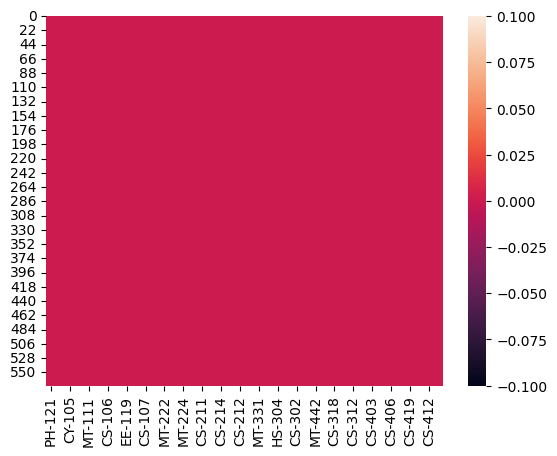

In [15]:
# representing null values by heatmap.
sns.heatmap(df.isnull())

In [16]:
df.head(10)

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B,D,C,C,C,D,D,C,B,C,...,C,C,C,C,A,A,C,B,A,2.205
1,A,D,D,D,B,C,D,A,D,D,...,D,D,C,D,A,B,C,C,B,2.008
2,A,B,A,B,B,A,B,B,A,A,...,B,B,A,C,A,A,A,A,A,3.608
3,D,C,D,D,D,A,D,C,D,C,...,D,C,D,C,B,B,C,C,C,1.906
4,A,A,A,B,A,A,A,B,A,A,...,B,B,B,B,A,A,A,A,A,3.448
5,A,B,B,D,C,A,C,B,B,B,...,C,B,C,C,A,A,B,B,B,3.026
6,B,C,A,D,A,B,A,B,A,B,...,B,C,B,B,A,A,B,B,A,2.957
7,B,B,C,C,C,A,C,A,B,A,...,D,B,B,C,A,B,A,A,A,3.043
8,A,C,A,D,B,A,A,A,B,A,...,B,B,B,C,A,A,B,A,A,3.358
9,A,B,C,B,B,A,C,B,A,A,...,C,B,B,B,A,A,A,B,A,3.247


In [17]:
# checking the correct format of floating-point by using unique function.
df['CGPA'].unique()

array([2.205, 2.008, 3.608, 1.906, 3.448, 3.026, 2.957, 3.043, 3.358,
       3.247, 2.681, 3.281, 2.792, 3.523, 3.443, 2.777, 3.248, 1.787,
       3.572, 3.483, 2.246, 2.956, 2.953, 3.586, 3.475, 2.228, 3.44 ,
       2.188, 3.195, 2.294, 3.133, 3.22 , 3.112, 3.16 , 3.019, 3.164,
       3.332, 2.165, 3.7  , 3.033, 2.696, 2.851, 3.058, 1.493, 2.069,
       1.996, 3.897, 3.848, 3.404, 2.254, 2.655, 3.106, 2.793, 3.023,
       3.01 , 3.4  , 1.899, 3.168, 2.57 , 2.418, 2.564, 2.468, 3.769,
       2.999, 2.768, 2.822, 3.189, 2.715, 3.578, 3.49 , 2.805, 3.458,
       2.34 , 3.252, 2.683, 3.378, 3.295, 3.193, 3.647, 2.815, 2.171,
       3.761, 2.763, 2.938, 2.06 , 1.261, 2.378, 2.861, 2.363, 2.084,
       1.38 , 1.89 , 3.861, 1.805, 3.925, 3.919, 3.258, 3.963, 2.396,
       3.772, 1.768, 3.176, 3.335, 3.758, 3.208, 1.845, 3.946, 2.3  ,
       3.759, 3.516, 2.087, 3.137, 2.011, 2.566, 1.993, 3.334, 2.056,
       2.552, 2.028, 2.58 , 3.651, 2.928, 2.659, 3.174, 3.03 , 2.208,
       2.698, 2.823,

In [18]:
# Set the display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

In [19]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B,D,C,C,C,D,D,C,B,C,...,C,C,C,C,A,A,C,B,A,2.21
1,A,D,D,D,B,C,D,A,D,D,...,D,D,C,D,A,B,C,C,B,2.01
2,A,B,A,B,B,A,B,B,A,A,...,B,B,A,C,A,A,A,A,A,3.61
3,D,C,D,D,D,A,D,C,D,C,...,D,C,D,C,B,B,C,C,C,1.91
4,A,A,A,B,A,A,A,B,A,A,...,B,B,B,B,A,A,A,A,A,3.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A,A,A,A,A,A,B,...,A,A,A,A,A,B,B,B,A,3.80
567,A,A,A,A,A,A,A,A,A,A,...,B,B,A,A,A,B,A,C,A,3.77
568,B,A,A,B,A,A,A,A,A,B,...,A,B,A,B,A,C,B,A,A,3.47
569,A,B,D,A,D,D,B,C,B,C,...,D,B,B,C,D,C,B,B,C,2.19


In [20]:
# getting summary description of dataset.
df.describe()

,CGPA
count,571.00
mean,2.95
std,0.62
min,0.80
25%,2.54
50%,3.03
75%,3.45
max,3.98


In [21]:
# We have noticed that in dataset the columns are in categorial type.
# Encoding categorial columns using OrdinalEncodes

In [22]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))

In [23]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,...,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00,571.00
mean,0.97,1.36,0.70,1.14,0.97,0.64,1.05,1.01,0.96,1.30,...,1.06,1.29,0.84,1.50,0.60,0.52,0.95,0.98,0.63,2.95
std,1.05,0.98,1.00,1.08,1.01,0.87,0.95,1.05,0.92,1.08,...,1.13,0.94,0.94,0.96,0.95,0.85,0.82,0.97,0.88,0.62
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.80
25%,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,2.54
50%,1.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,3.03
75%,2.00,2.00,1.00,2.00,2.00,1.00,1.00,2.00,2.00,2.00,...,2.00,2.00,1.00,2.00,1.00,1.00,1.00,2.00,1.00,3.45
max,5.00,4.00,5.00,5.00,5.00,3.00,5.00,5.00,4.00,5.00,...,6.00,4.00,3.00,5.00,6.00,5.00,4.00,4.00,5.00,3.98


#### Count indicates the number of non-null values present. If the mean is greater than the median (50th percentile), it suggests that the dataset is positively skewed. Let's examine this step by step.

### Univariate Analysis

CGPA
3.02    5
3.06    3
2.79    3
3.44    3
2.21    3
       ..
2.56    1
2.04    1
2.63    1
2.05    1
1.75    1
Name: count, Length: 491, dtype: int64

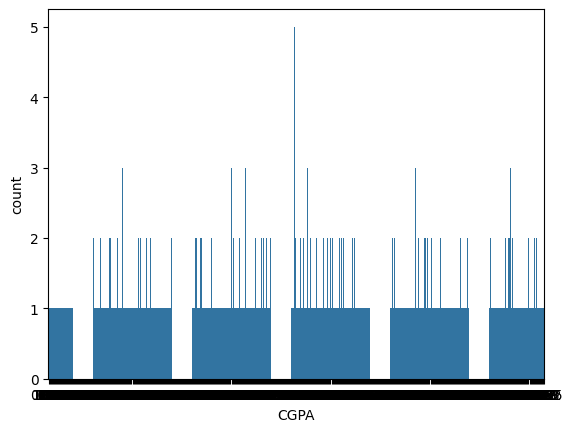

In [24]:
ax = sns.countplot(x= 'CGPA', data=df)
df['CGPA'].value_counts()

#### Checking outliers

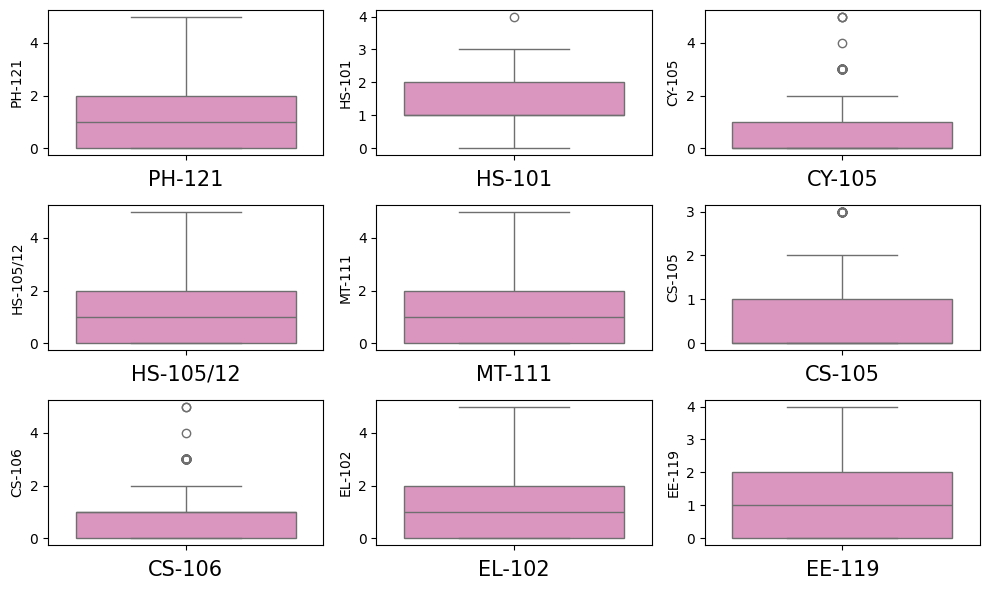

In [25]:
# Before removing outliers.
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in df.columns:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [26]:
# As we can see there are outliear present in this dataset.

In [27]:
# Removing outliers
from scipy import stats

for col in df.columns:
    z_scores = stats.zscore(df[col])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3)
    df = df[filtered_entries]

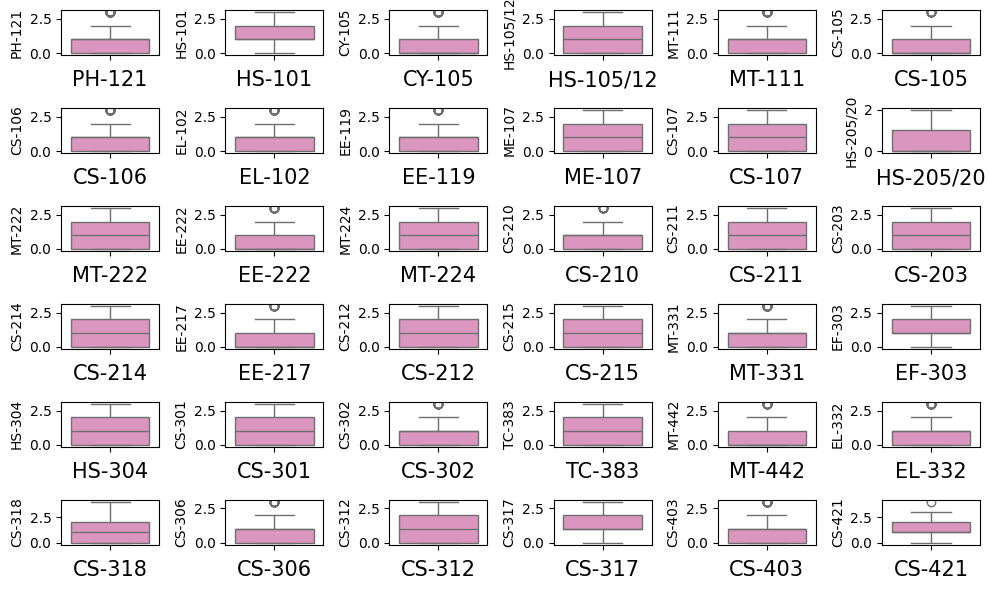

In [28]:
# After removing outliers.
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in df.columns:
    if plotnumber <=36:
        ax = plt.subplot(6,6,plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [29]:
# After removing the possible outliers we can see total number are reduced.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, 0 to 568
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     503 non-null    float64
 1   HS-101     503 non-null    float64
 2   CY-105     503 non-null    float64
 3   HS-105/12  503 non-null    float64
 4   MT-111     503 non-null    float64
 5   CS-105     503 non-null    float64
 6   CS-106     503 non-null    float64
 7   EL-102     503 non-null    float64
 8   EE-119     503 non-null    float64
 9   ME-107     503 non-null    float64
 10  CS-107     503 non-null    float64
 11  HS-205/20  503 non-null    float64
 12  MT-222     503 non-null    float64
 13  EE-222     503 non-null    float64
 14  MT-224     503 non-null    float64
 15  CS-210     503 non-null    float64
 16  CS-211     503 non-null    float64
 17  CS-203     503 non-null    float64
 18  CS-214     503 non-null    float64
 19  EE-217     503 non-null    float64
 20  CS-212     503 

In [30]:
# Let's check the skewness in this dataset.
df.skew()

PH-121       0.94
HS-101       0.23
CY-105       1.40
HS-105/12    0.58
MT-111       0.81
CS-105       1.36
CS-106       0.77
EL-102       0.80
EE-119       0.71
ME-107       0.38
CS-107       0.71
HS-205/20    0.74
MT-222       0.42
EE-222       1.07
MT-224       0.68
CS-210       0.93
CS-211       0.30
CS-203       0.49
CS-214       0.16
EE-217       1.02
CS-212       0.56
CS-215       0.34
MT-331       0.92
EF-303       0.29
HS-304       0.38
CS-301       0.62
CS-302       0.81
TC-383       0.57
MT-442       1.22
EL-332       0.58
CS-318       0.43
CS-306       0.62
CS-312       0.60
CS-317       0.27
CS-403       0.82
CS-421       0.16
CS-406       1.23
CS-414       1.40
CS-419       0.48
CS-423       0.66
CS-412       0.91
CGPA        -0.37
dtype: float64

In [31]:
# There appears to be skewness present in this dataset.

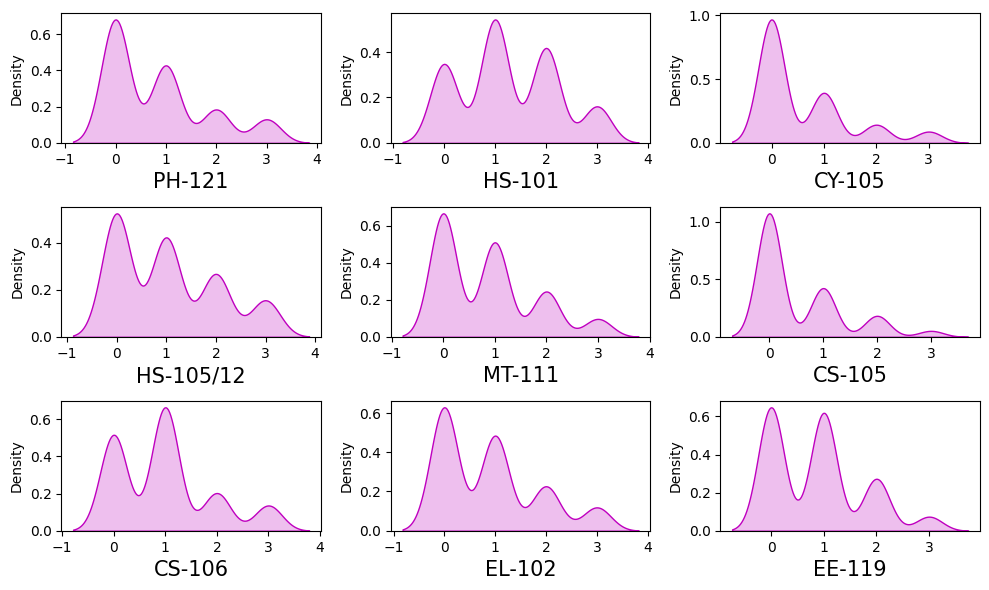

In [32]:
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in df.columns:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[col], color='m', kde_kws={'shade' : True}, hist=False)
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

##### Removing Skewness

In [33]:
# Compute skewness for each numeric column
skewness = df.skew()

# Correct skewness for columns where it exceeds threshold (0.5 or -0.5)
for col in df.columns:
    if np.abs(skewness[col]) > 0.5:
        if skewness[col] > 0:
            # Apply log transformation for positively skewed data
            df[col] = np.log1p(df[col])
        else:
            # Apply exponential transformation for negatively skewed data
            df[col] = np.exp(df[col])

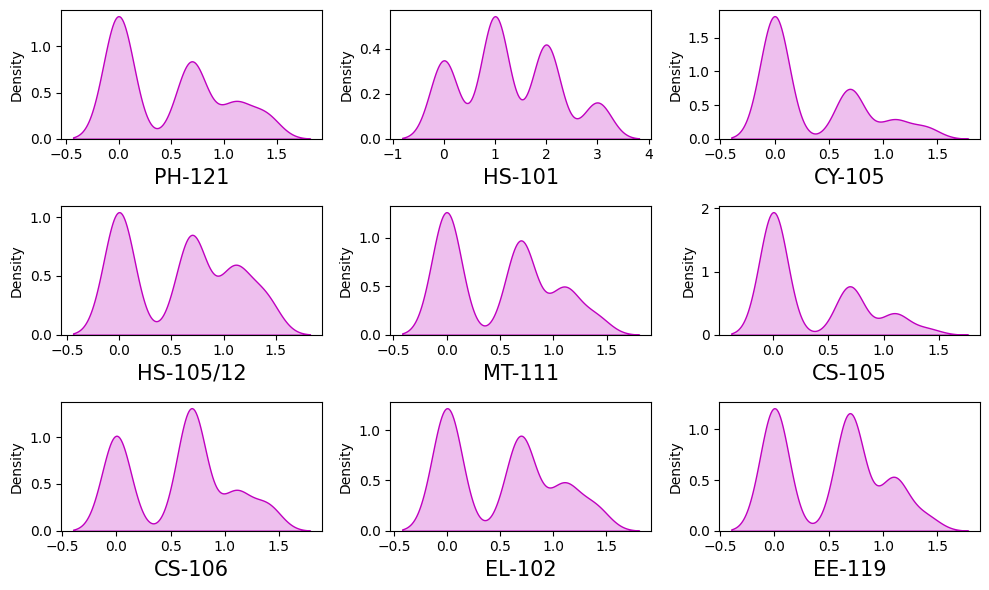

In [34]:
# After removing all the skewness.
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in df.columns:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[col], color='m', kde_kws={'shade' : True}, hist=False)
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [35]:
# checking again.
df.skew()

PH-121       0.41
HS-101       0.23
CY-105       0.87
HS-105/12    0.06
MT-111       0.25
CS-105       0.86
CS-106       0.04
EL-102       0.25
EE-119       0.12
ME-107       0.38
CS-107       0.22
HS-205/20    0.38
MT-222       0.42
EE-222       0.56
MT-224       0.16
CS-210       0.35
CS-211       0.30
CS-203       0.49
CS-214       0.16
EE-217       0.45
CS-212      -0.13
CS-215       0.34
MT-331       0.40
EF-303       0.29
HS-304       0.38
CS-301       0.02
CS-302       0.11
TC-383       0.07
MT-442       0.73
EL-332       0.01
CS-318       0.43
CS-306       0.09
CS-312       0.23
CS-317       0.27
CS-403       0.33
CS-421       0.16
CS-406       0.90
CS-414       1.07
CS-419       0.48
CS-423       0.11
CS-412       0.57
CGPA        -0.37
dtype: float64

In [36]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,503.00,503.00,503.00,503.00,503.00,503.00,503.00,503.00,503.00,503.00,...,503.00,503.00,503.00,503.00,503.00,503.00,503.00,503.00,503.00,503.00
mean,0.48,1.27,0.35,0.58,0.50,0.33,0.57,0.51,0.51,1.17,...,0.54,1.19,0.48,1.37,0.26,0.24,0.87,0.53,0.32,3.07
std,0.50,0.94,0.46,0.51,0.48,0.44,0.46,0.49,0.46,1.02,...,0.54,0.89,0.49,0.85,0.38,0.37,0.77,0.47,0.39,0.53
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.71
25%,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,2.70
50%,0.69,1.00,0.00,0.69,0.69,0.00,0.69,0.69,0.69,1.00,...,0.69,1.00,0.69,1.00,0.00,0.00,1.00,0.69,0.00,3.11
75%,0.69,2.00,0.69,1.10,0.69,0.69,0.69,0.69,0.69,2.00,...,1.10,2.00,0.69,2.00,0.69,0.69,1.00,0.69,0.69,3.49
max,1.39,3.00,1.39,1.39,1.39,1.39,1.39,1.39,1.39,3.00,...,1.39,3.00,1.39,4.00,1.10,1.10,3.00,1.39,1.10,3.98


In [37]:
# Now Correlation between target variable and independent variable.
cor = df.corr()
cor

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.00,0.30,0.51,0.46,0.35,0.58,0.28,0.33,0.56,0.49,...,-0.07,0.41,0.30,0.26,0.20,0.03,0.45,0.03,0.22,-0.55
HS-101,0.30,1.00,0.29,0.45,0.38,0.36,0.34,0.30,0.25,0.29,...,0.20,0.34,0.23,0.25,0.28,0.18,0.30,0.21,0.18,-0.51
CY-105,0.51,0.29,1.00,0.50,0.47,0.55,0.32,0.38,0.47,0.43,...,0.20,0.48,0.47,0.40,0.07,-0.08,0.49,0.15,0.03,-0.64
HS-105/12,0.46,0.45,0.50,1.00,0.42,0.49,0.48,0.28,0.32,0.28,...,0.26,0.44,0.45,0.42,0.10,0.00,0.47,0.17,0.09,-0.60
MT-111,0.35,0.38,0.47,0.42,1.00,0.29,0.49,0.44,0.34,0.42,...,0.45,0.53,0.43,0.50,0.24,0.10,0.50,0.40,0.17,-0.72
CS-105,0.58,0.36,0.55,0.49,0.29,1.00,0.22,0.28,0.48,0.42,...,-0.07,0.33,0.28,0.21,0.17,0.05,0.34,-0.01,0.13,-0.53
CS-106,0.28,0.34,0.32,0.48,0.49,0.22,1.00,0.26,0.24,0.29,...,0.44,0.41,0.43,0.39,0.09,0.05,0.45,0.30,0.17,-0.56
EL-102,0.33,0.30,0.38,0.28,0.44,0.28,0.26,1.00,0.37,0.39,...,0.28,0.44,0.31,0.33,0.19,0.21,0.35,0.38,0.23,-0.60
EE-119,0.56,0.25,0.47,0.32,0.34,0.48,0.24,0.37,1.00,0.54,...,0.08,0.40,0.31,0.32,0.16,0.05,0.42,0.20,0.29,-0.58
ME-107,0.49,0.29,0.43,0.28,0.42,0.42,0.29,0.39,0.54,1.00,...,0.15,0.43,0.35,0.34,0.26,0.06,0.46,0.19,0.24,-0.64


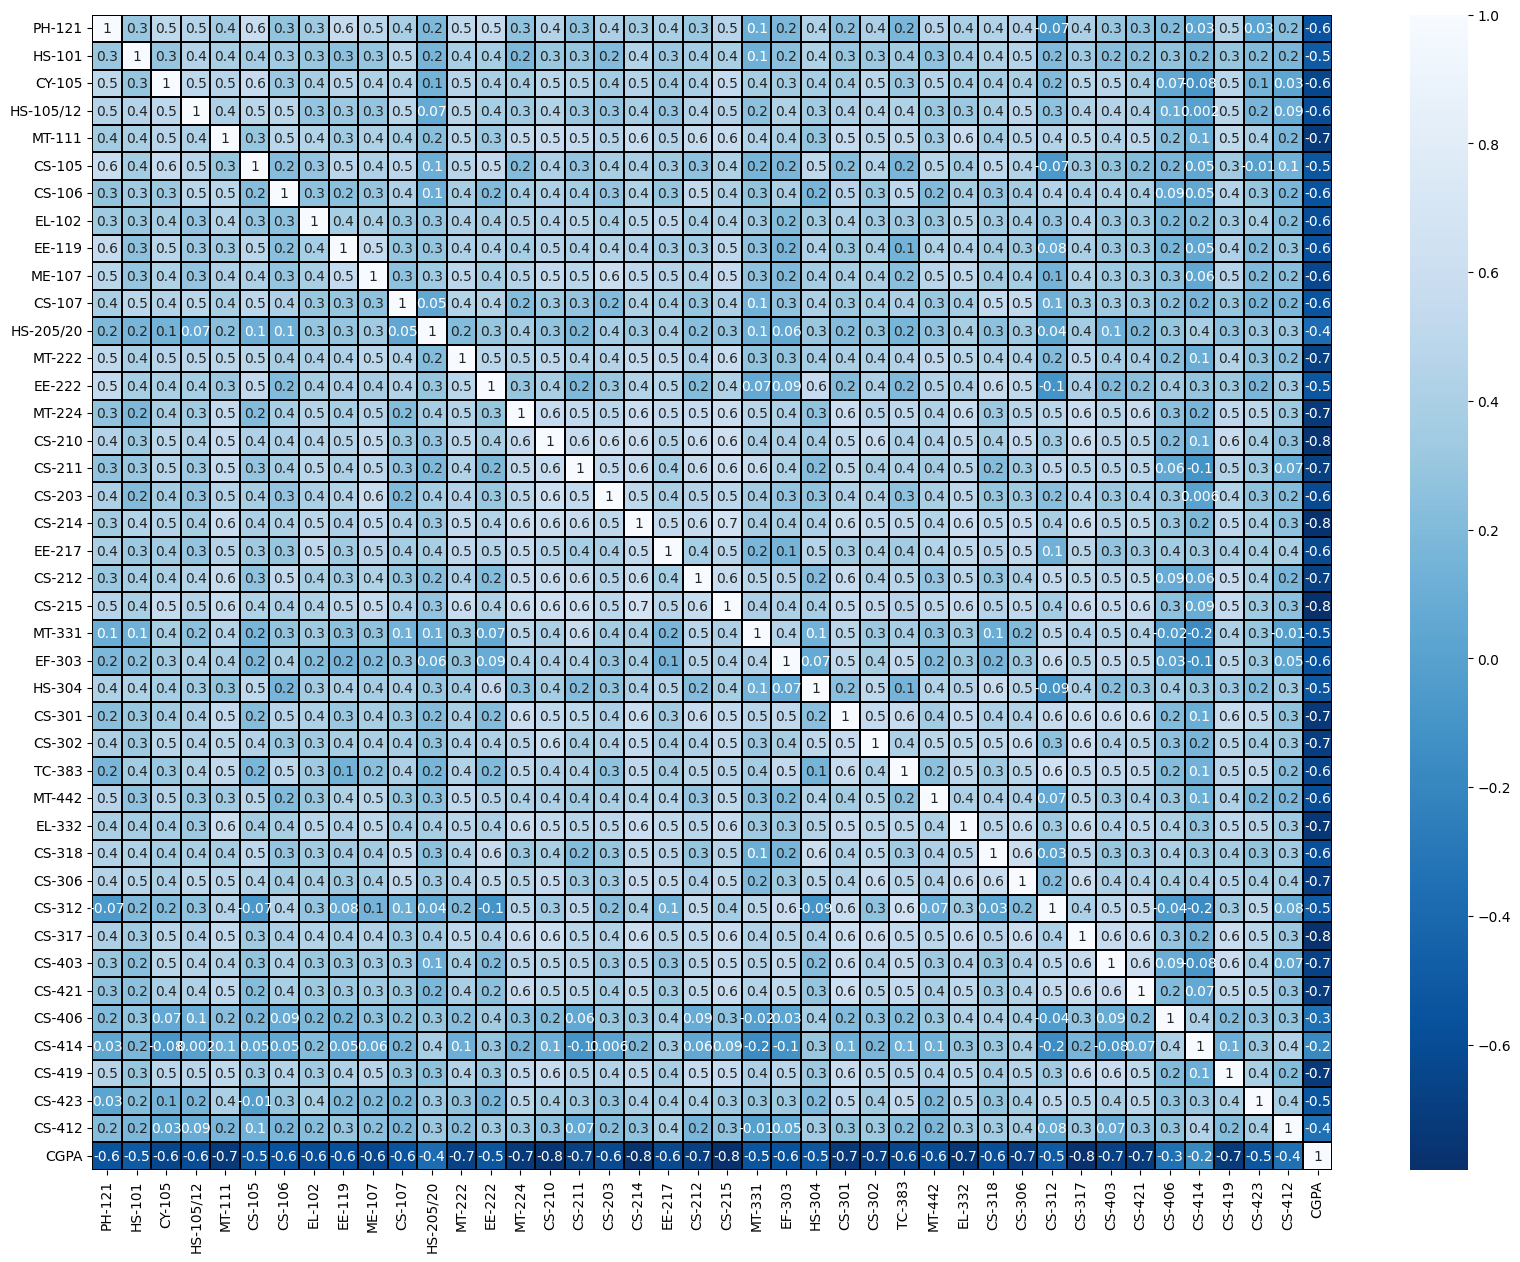

In [38]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation = 0)

plt.show()

In [39]:
# There is not a strong positive correlation between the target and features.
# We can observe a strong negative correlation with values greater than -0.7.

#### When two independent features are highly correlated, we can drop one of the columns.

In [40]:
# We can clearly see that there is no positive correlation with the target value,
# but there is a highly negative correlation with the target value.
cor['CGPA'].sort_values(ascending=False)

CGPA         1.00
CS-414      -0.18
CS-406      -0.35
CS-412      -0.35
HS-205/20   -0.37
CS-312      -0.50
HS-101      -0.51
HS-304      -0.53
EE-222      -0.53
CS-423      -0.53
CS-105      -0.53
MT-331      -0.54
CS-107      -0.55
PH-121      -0.55
CS-106      -0.56
EF-303      -0.57
EE-119      -0.58
CS-318      -0.59
MT-442      -0.59
EL-102      -0.60
HS-105/12   -0.60
EE-217      -0.62
CS-203      -0.62
ME-107      -0.64
CY-105      -0.64
TC-383      -0.65
MT-222      -0.67
CS-403      -0.68
CS-211      -0.68
CS-212      -0.69
CS-302      -0.69
CS-306      -0.70
CS-421      -0.71
MT-224      -0.72
CS-419      -0.72
MT-111      -0.72
CS-301      -0.73
EL-332      -0.74
CS-210      -0.76
CS-214      -0.78
CS-317      -0.78
CS-215      -0.79
Name: CGPA, dtype: float64

In [41]:
# Separating feature and label
x = df.drop('CGPA', axis=1)
y = df['CGPA']

In [42]:
# Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [43]:
# Checking Variance Inflation Factor(VIF)
# Checking VIF values to confirm whether multicollinearity exists or not.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Feature Values'] = x.columns

In [44]:
vif
# So, we can clearly see that there is no multicollinearity present, so we don't need to drop any columns.

,VIF Values,Feature Values
0,2.68,PH-121
1,1.88,HS-101
2,2.38,CY-105
3,2.35,HS-105/12
4,2.37,MT-111
5,2.56,CS-105
6,1.90,CS-106
7,1.88,EL-102
8,2.11,EE-119
9,2.26,ME-107


### Modelling

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [46]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=.2, shuffle=True)

# RandomForestRegressor

In [47]:
RFR=RandomForestRegressor()
RFR.fit(x_train, y_train)

RandomForestRegressor()

In [48]:
y_pred=RFR.predict(x_test)
mean_squared_error(y_test,y_pred)

0.016815500251730845

In [49]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.10558213920320601


In [50]:
r2_score(y_test,y_pred)

0.9420228208993794

# LinearRegression

In [51]:
LR=LinearRegression()
LR.fit(x_train, y_train)
y_pred=LR.predict(x_train)
mean_squared_error(y_train,y_pred)

0.0029845001486939787

In [52]:
y_pred=LR.predict(x_test)
mean_squared_error(y_test,y_pred)

0.00465669351977786

In [53]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.05245280093528719


In [54]:
r2_score(y_test,y_pred)

0.9839444589711168

# SVR

In [55]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train, y_train)
y_pred=svr.predict(x_train)
mean_squared_error(y_train,y_pred)

0.0036773117091780804

In [56]:
y_pred=svr.predict(x_test)
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.06673916895191193


In [57]:
r2_score(y_test,y_pred)

0.9740284462707105

# KNeighborsRegressor

In [58]:
!pip install --upgrade scikit-learn numpy threadpoolctl
from sklearn.neighbors import KNeighborsRegressor
KNR=KNeighborsRegressor()
KNR.fit(x_train, y_train)
y_pred=KNR.predict(x_train)
mean_squared_error(y_train,y_pred)

  Using cached numpy-2.0.0-cp310-cp310-win_amd64.whl (16.5 MB)


0.007980894527363185

In [59]:
y_pred=KNR.predict(x_test)
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.10027722772277226


In [60]:
r2_score(y_test,y_pred)

0.9437357933865522

#### LinearRegression seems to be the best model for your data as it achieves the highest 𝑅2 score, indicating the best fit to your data among the models compared.

In [61]:
# Saving the model using .pkl
import joblib
joblib.dump(LR, 'cgpa_prediction.pkl')

['cgpa_prediction.pkl']

In [62]:
if isinstance(LR, LinearRegression):
    coefficients = LR.coef_
    feature_names = x.columns
    # Print or visualize coefficients and feature names

In [63]:
from sklearn.model_selection import cross_val_score

# cross-validation
cv_scores = cross_val_score(LR, x, y, cv=5, scoring='r2')
print(f'Cross-validated R-squared scores: {cv_scores}')

Cross-validated R-squared scores: [0.98482974 0.985631   0.98175063 0.98052907 0.96256995]


In [64]:
# Predicting the saved model
model = joblib.load('cgpa_prediction.pkl')
prediction = model.predict(x_test)

In [65]:
# Confirming
a = np.array(y_test)
df = pd.DataFrame()
df['Predict'] = prediction
df['Original'] = a
df

,Predict,Original
0,2.30,2.30
1,2.83,2.71
2,3.00,3.06
3,3.28,3.27
4,2.86,2.81
...,...,...
96,3.74,3.58
97,3.63,3.62
98,3.29,3.36
99,3.58,3.55
